In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# (Extra Step) - Explore the Columns and their Data Types

In [10]:
Measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [11]:
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [12]:
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [13]:
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months = session.query(func.max(Measurement.date)).first()
last_12_months = [r for r in last_12_months]
last_dates = dt.datetime.strptime(last_12_months[0], '%Y-%m-%d')
last_dates

datetime.datetime(2017, 8, 23, 0, 0)

In [15]:
# Calculate the date 1 year ago from the last data point in the database
year_before = last_dates - dt.timedelta(days=365)
year_before

datetime.datetime(2016, 8, 23, 0, 0)

In [16]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before).all()
query_data = [r for r in query]

In [40]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(query_data,columns = ['date', 'precipitation'])
precipitation_df['date'] = pd.to_datetime(precipitation_df.date)
precipitation_df.set_index('date', inplace=True)
precipitation_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [49]:
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by = 'date',ascending=False)
precipitation_df = precipitation_df.dropna()
precipitation_df

,precipitation
date,
2017-08-23,0.45
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-22,0.50
2017-08-22,0.00
2017-08-22,0.00
2017-08-21,0.00
2017-08-21,0.56


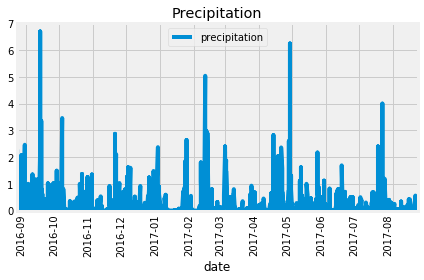

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.ylim(0,7)
plt.title("Precipitation")
plt.legend(loc='upper center')
plt.xticks(rotation=90)
plt.tight_layout()

![precipitation](Images/precipitation.png)

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe().dropna()

# or you can see the statistics in transposed view:
# precipitation_df.describe().transpose()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
# Design a query to show how many stations are available in this dataset?
stations_available = session.query(func.count(Station.station)).all()
print(stations_available)

[(9,)]


In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).all()
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
statistics = [Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

temp_statistics=session.query(*statistics).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).first()
temp_statistics

('USC00519281', 54.0, 85.0, 71.66378066378067)

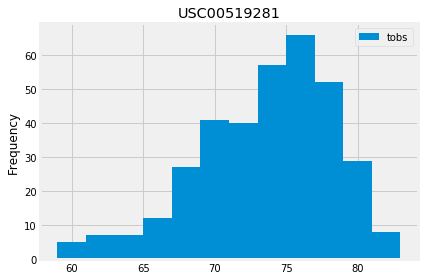

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = [r for r in session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station
            ).order_by(func.count(Measurement.tobs).desc()).first()]
highest_tobs = query[0]
tobs_query = session.query(Measurement.tobs).filter(Measurement.date >= year_before).filter(Measurement.station == highest_tobs).all()
tobs_query_df = pd.DataFrame(tobs_query)
tobs_query_df.head()
tobs_query_df.plot.hist(bins=12)
plt.title(highest_tobs)
plt.legend(loc='upper right')
plt.tight_layout()

![precipitation](Images/station-histogram.png)

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [50]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2018,5,1)
end_date = dt.date(2018,5,10)
previous_year_start_date = start_date - dt.timedelta(days=365)
previous_year_end_date = end_date - dt.timedelta(days=365)
tmin, tavg, tmax = calc_temps(previous_year_start_date, previous_year_end_date)[0]
print(tmin, tavg, tmax)

65.0 75.12280701754386 80.0


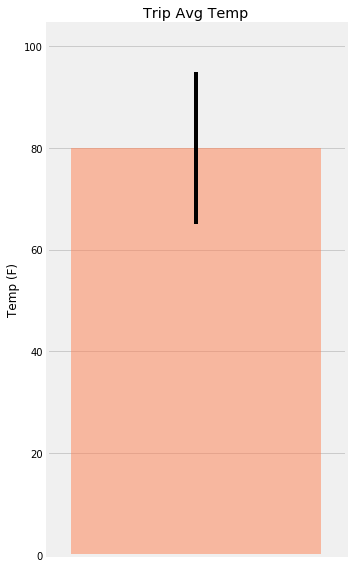

In [64]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
xpos = 1
yerr = tmax-tmin

plt.figure(figsize=(5,8))
plt.bar(xpos, tmax, yerr = yerr, alpha = 0.5, width = 0.1, color = 'coral', align="center")
plt.xticks(np.arange(1, 1.0))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.margins(0.1,0.1)
plt.tight_layout()


In [66]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_query = [r for r in session.query(Measurement.station,Station.name, Station.latitude,
    Station.longitude, Station.elevation, func.sum(Measurement.prcp)).filter(Measurement.date >= previous_year_start_date
    ).filter(Measurement.date <= previous_year_end_date).group_by(Measurement.station
    ).order_by(func.sum(Measurement.prcp).desc()).all()]
trip_query


[('USC00519281',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  24.119999999999987),
 ('USC00516128',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  20.430000000000007),
 ('USC00513117',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  18.630000000000013),
 ('USC00514830',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  17.459999999999994),
 ('USC00519523',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  7.289999999999996),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 2.34)]

## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [32]:
# Plot the daily normals as an area plot with `stacked=False`
